<a href="https://colab.research.google.com/github/JalajaMaryThangappan/Deep-learning/blob/main/A_Simple_Classifier_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Gaussian Naive Bayes
Accuracy: 86.67%
Classification Report:

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.73      0.85        15

    accuracy                           0.87        30
   macro avg       0.89      0.87      0.86        30
weighted avg       0.89      0.87      0.86        30


Decision Tree
Accuracy: 90.00%
Classification Report:

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       1.00      0.80      0.89        15

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30


Random Forest
Accuracy: 86.67%
Classification Report:

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.73      0.85        15

    acc

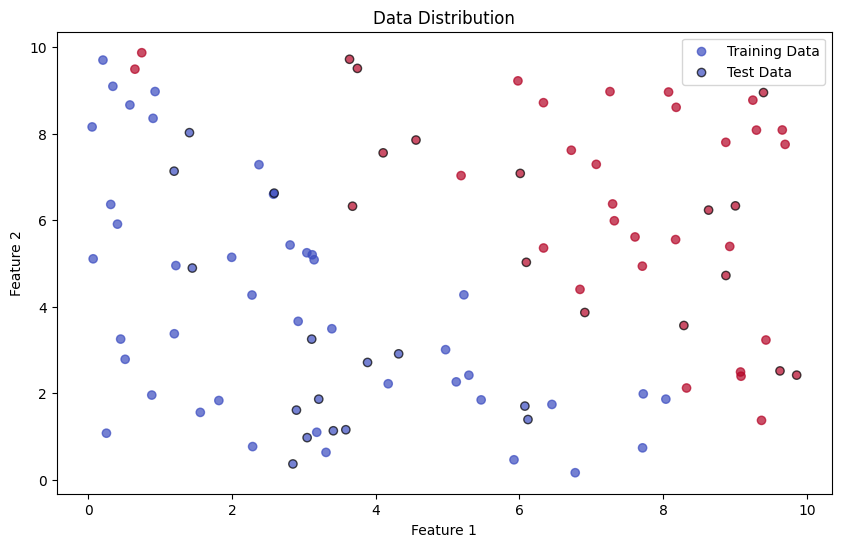

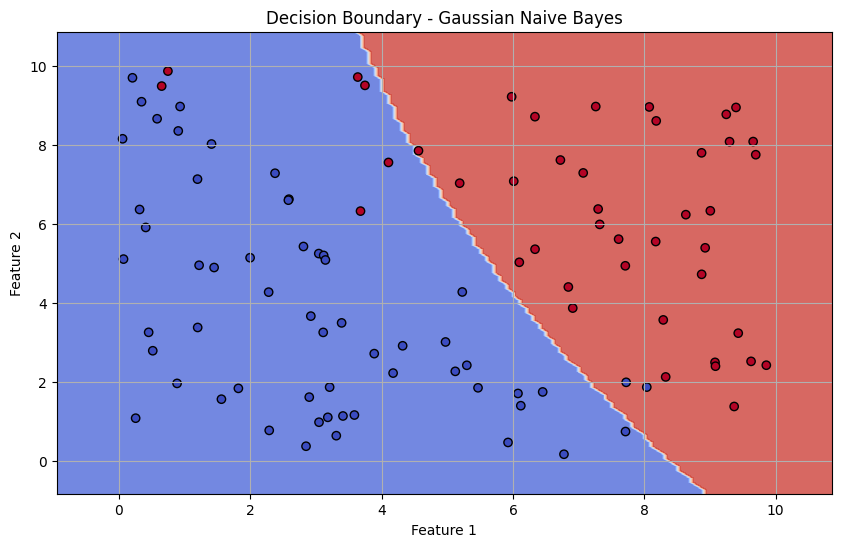

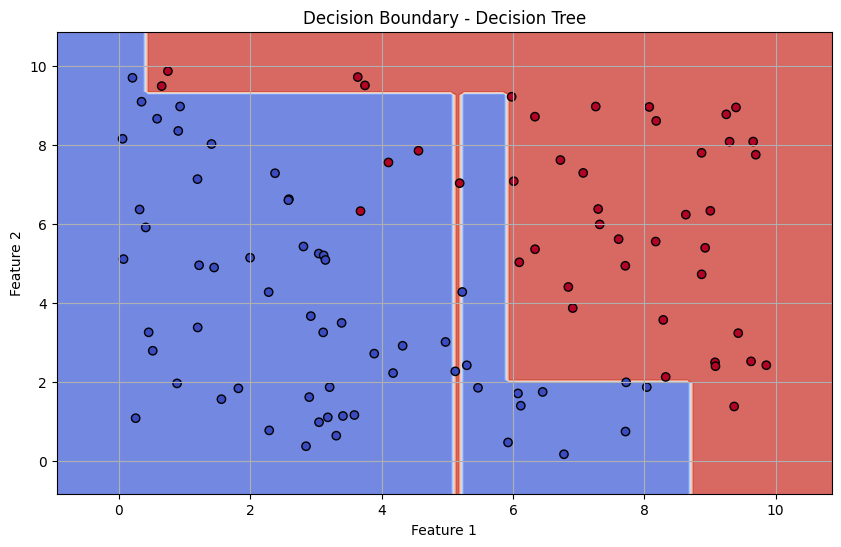

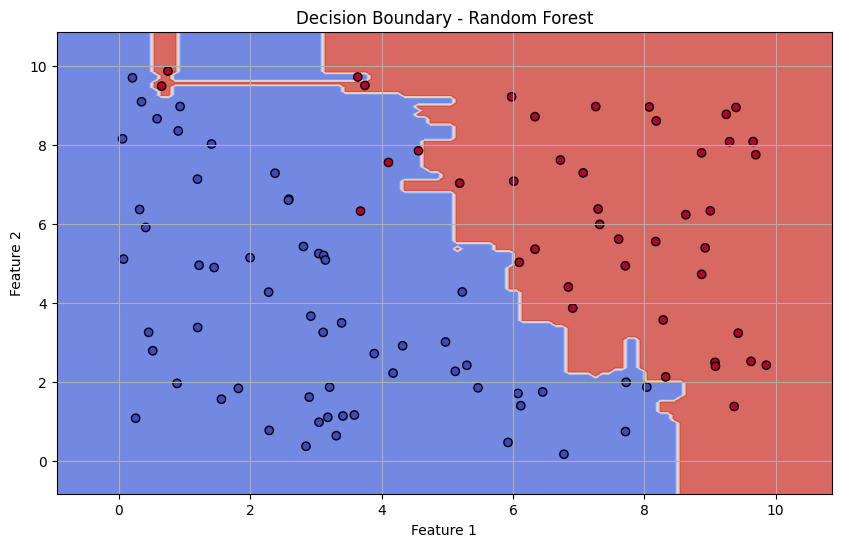

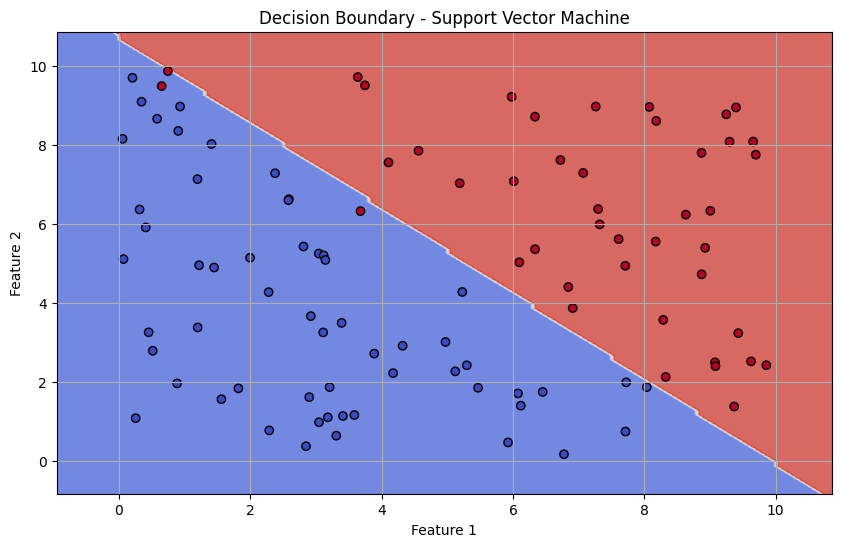

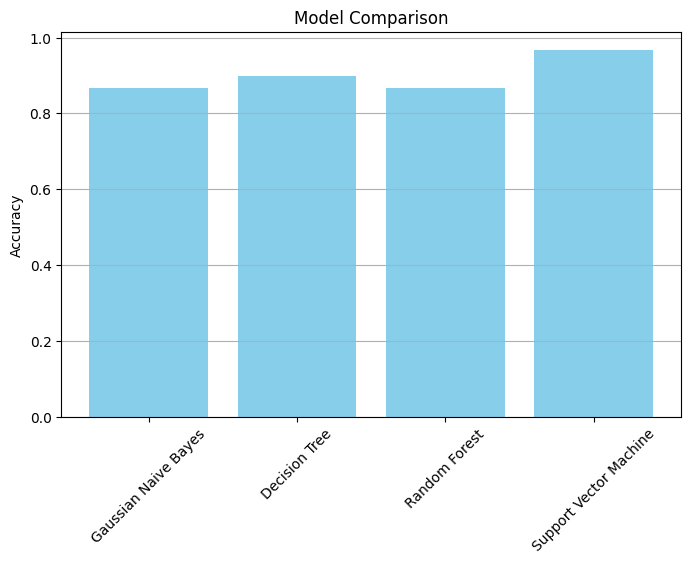

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Generate some sample data
# Features: 2D array with two features
# Labels: Binary labels (0 or 1)
np.random.seed(42)
X = np.random.rand(100, 2) * 10  # 100 samples, 2 features
y = (X[:, 0] + X[:, 1] > 10).astype(int)  # Simple rule for labels

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models to compare
models = {
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42)
}
# Train and evaluate each model
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f"\n{name}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:\n")
    print(classification_report(y_test, y_pred))

# Example: Predicting for a new sample
new_sample = np.array([[6, 5], [2, 1]])
for name, model in models.items():
    new_prediction = model.predict(new_sample)
    print(f"{name} Predictions: {new_prediction}")

# Visualization
# Scatter plot of the data
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', label='Training Data', alpha=0.7)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', label='Test Data', alpha=0.7)
plt.title('Data Distribution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Decision boundary visualization for each model
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

for name, model in models.items():
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    plt.title(f'Decision Boundary - {name}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

# Summary of accuracies
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()
